# Описание

Самый простой фрактал

In [1]:
import numpy as np

In [2]:
from scipy.special import comb
def B(i, N, t):
    val = comb(N,i) * t**i * (1.-t)**(N-i)
    return val

In [3]:
def P(t, X):
    '''
     xx = P(t, X)
     
     Evaluates a Bezier curve for the points in X.
     
     Inputs:
      X is a list (or array) or 2D coords
      t is a number (or list of numbers) in [0,1] where you want to
        evaluate the Bezier curve
      
     Output:
      xx is the set of 2D points along the Bezier curve
    '''
    X = np.array(X)
    N,d = np.shape(X)   # Number of points, Dimension of points
    N = N - 1
    xx = np.zeros((len(t), d))
    
    for i in range(N+1):
        xx += np.outer(B(i, N, t), X[i])
    
    return xx

[]


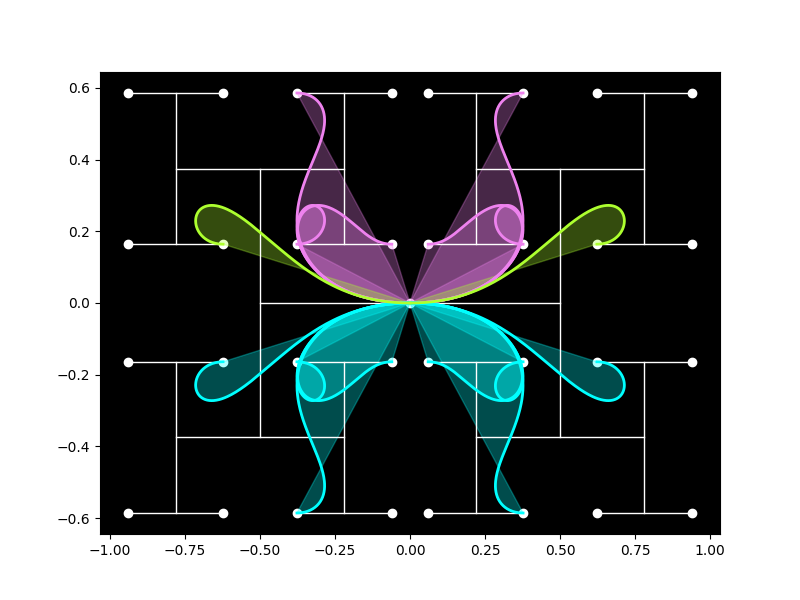

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

def createFractal(ax, gens, diffX, diffY, angleA=0, angleB=90):
    vec = lambda angle: np.array(
        (np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle)))
    )

    a = vec(angleA)
    b = vec(angleB)


    coefX = lambda gen: diffX**(gen+1)
    coefY = lambda gen: diffY**(gen+1)

    A = np.array([[-a/2, a/2]])

    for gen in range(gens):
        add = (a*coefX(gen))/2 if (gen%2 == 1) else (b*coefY(gen))/2
        for j in range(2**gen):
            A = np.concat(
                (A,
                [
                    [   
                        A[2**gen-1+j][1] - add, 
                        A[2**gen-1+j][1] + add 
                    ],
                    [     # coord   component
                        A[2**gen-1+j][0] - add, 
                        A[2**gen-1+j][0] + add
                    ]
                ]),
                axis = 0
            )
    return A

fig, ax = plt.subplots(figsize=(8, 6))
diff = 0.75
gens = 4

A = createFractal(ax, gens, diff, diff, 0, 90)

print(A[2**gens:2**(gens-1)])


ax.set_facecolor('black')
ax.scatter(0,0, c="white")
for i in range(len(A)):
    ax.plot(*A[i].T, c="white", lw=1)
for i in range(2**gens-1, 2**(gens+1)-1):
# for i in range(2**(gens+1)-1):
    ax.scatter(*A[i][0], c="white")
    # ax.annotate(f"{i}_0", A[i][0])
    ax.scatter(*A[i][1], c="white")
    # ax.annotate(f"{i}_1", A[i][1])
    
flower = {
    "violet":[
        [(0,0), A[0][0], A[2][1], A[5][1], A[11][0], A[24][0]],
        [(0,0), A[0][0], A[2][1], A[5][1], A[11][0], A[24][1]],
        [(0,0), A[0][0], A[2][1], A[5][1], A[11][1], A[23][0]],
        [(0,0), A[0][1], A[1][1], A[3][0], A[8][0], A[18][0]],
        [(0,0), A[0][1], A[1][1], A[3][0], A[8][0], A[18][1]],
        [(0,0), A[0][1], A[1][1], A[3][0], A[8][1], A[17][1]]
    ],
    "cyan":[
        [(0,0), A[0][0], A[2][0], A[6][1], A[13][1], A[27][0]],
        [(0,0), A[0][0], A[2][0], A[6][1], A[13][1], A[27][1]],
        [(0,0), A[0][0], A[2][0], A[6][1], A[13][0], A[28][0]],
        [(0,0), A[0][0], A[2][0], A[6][0], A[14][1], A[29][1]],
        [(0,0), A[0][1], A[1][0], A[4][0], A[10][1], A[21][0]],
        [(0,0), A[0][1], A[1][0], A[4][0], A[10][1], A[21][1]],
        [(0,0), A[0][1], A[1][0], A[4][0], A[10][0], A[22][1]],
        [(0,0), A[0][1], A[1][0], A[4][1], A[9][1], A[19][0]],
    ],
    "greenyellow":[
        [(0,0), A[0][0], A[2][1], A[5][0], A[12][0], A[26][1]],
        [(0,0), A[0][1], A[1][1], A[3][1], A[7][0], A[16][0]]
    ]

}

tt = np.linspace(0, 1, 200)

for color in flower.keys():
    for X in flower[color]:
        xx = P(tt, X)
        ax.plot(xx[:,0], xx[:,1], c=color, lw=2)
        ax.fill(xx[:,0], xx[:,1], c=color, alpha=0.3)

# plt.plot(X[:,0], X[:,1], 'ro');


# ax.plot(*np.concat(([vec(angleA)/4], [[0,0]])).T, c = "green")
# ax.plot(*np.concat(([vec(angleB)/4], [[0,0]])).T, c = "red")

# fig.show()
# fig.savefig('temp.svg')


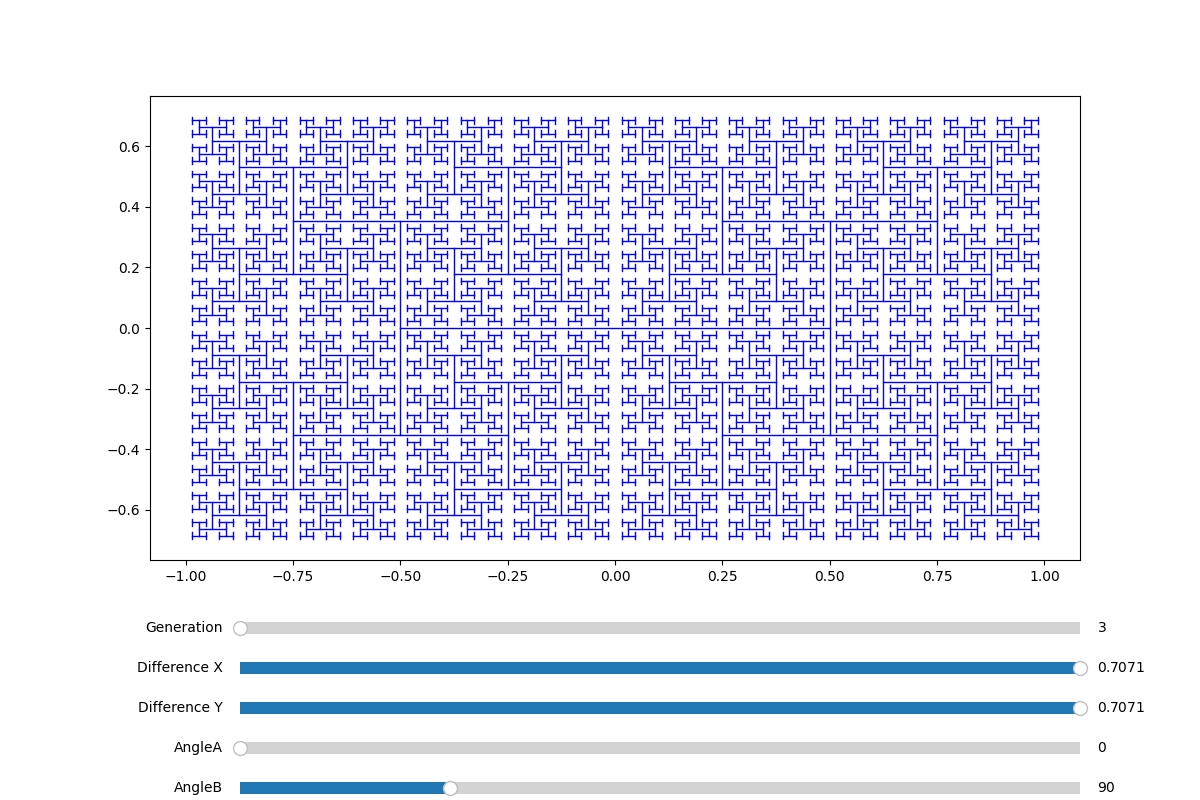

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def update(val):
    ax.clear()
    gens = gens_slider.val
    diffX = diffX_slider.val
    diffY = diffY_slider.val
    angleA = angleA_slider.val
    angleB = angleB_slider.val
    for i in range(2**(gens+1)-1):
        ax.plot(*A[i].T, c="blue", lw=1)
    plt.draw()

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.3)

# Начальная длина фрактала
color = "blue"
max_gens = 11

angleA = 0
angleB = 90

diff = np.sqrt(2)/2
diffX = diff
diffY = diff

A = createFractal(ax, max_gens, diffX, diffY, angleA, angleB)
for i in range(len(A)):
    ax.plot(*A[i].T, c="blue", lw=1)
slider_size = (0.2, 0.7)

# Настраиваем слайдер
gens_slider = Slider(
    plt.axes([slider_size[0], 0.2, slider_size[1], 0.03]), 
    'Generation', 3, max_gens, 
    valstep=1)
diffX_slider = Slider(
    plt.axes([slider_size[0], 0.15, slider_size[1], 0.03]), 
    'Difference X', 0, np.sqrt(2)/2, 
    valinit=diffX)
diffY_slider = Slider(
    plt.axes([slider_size[0], 0.1, slider_size[1], 0.03]), 
    'Difference Y', 0, np.sqrt(2)/2, 
    valinit=diffY)
angleA_slider = Slider(
    plt.axes([slider_size[0], 0.05, slider_size[1], 0.03]), 
    'AngleA', 0, 360, 
    valstep=1, valinit=angleA)
angleB_slider = Slider(
    plt.axes([slider_size[0], 0, slider_size[1], 0.03]), 
    'AngleB', 0, 360, 
    valstep=1, valinit=angleB)

gens_slider.on_changed(update)
diffX_slider.on_changed(update)
diffY_slider.on_changed(update)
angleA_slider.on_changed(update)
angleB_slider.on_changed(update)

plt.show()


Параметры `diffX` и `diffY` позволяют настроить сближение концов отрезков на последнем уровне.
Для этого нужно решить два уравнения:
$$
\sum_{n=1}^{m}d^{2n}\to1, d>0 \tag{1}
$$
При раскрытии суммы получаем формулу:
$$
\frac{d^2(d^{2m}-1)}{d^2-1}\to1, d>0  \tag{2}
$$
**Открытая задача:** найти формулу функции $d(m)$ по уравнению (2)

$$
\begin{array}{l}
    \dfrac{(d^{2m}-1)}{1-d^{-2}}\to1\\[10pt]
    d^{2m}+d^{-2}-2\to0\\
\end{array}
$$


---

Для полного фрактала $m\to\infty$ и $d^{2m}\to0$.  
Тогда формула примет вид:
$$
\frac{-d^2}{d^2-1}\to1, d>0
$$
И ответом будет $d\to\dfrac{\sqrt{2}}{2}$
